<a href="https://colab.research.google.com/github/siddharth0517/Tata-Motors-Stock-Price-Prediction-using-SVR/blob/main/Stock_Price_Prediction_Using_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tatamotors Stock Price Prediction Using SVR

**1. Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2. Importing Dataset**

In [2]:
Dataset = pd.read_csv('Tatamotors.csv')
print(Dataset.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2020-01-01  185.149994  186.699997  183.600006  184.449997  183.311218   
1  2020-01-02  185.000000  194.699997  184.600006  193.750000  192.553802   
2  2020-01-03  192.899994  195.649994  189.250000  191.100006  189.920181   
3  2020-01-06  191.000000  191.000000  185.050003  185.649994  184.503815   
4  2020-01-07  187.000000  189.399994  182.300003  184.699997  183.559677   

     Volume  
0  25968357  
1  57289863  
2  47572728  
3  28621212  
4  34995035  


In [3]:
Dataset['MA20'] = Dataset['Adj Close'].rolling(window=20).mean()
Dataset['MA50'] = Dataset['Adj Close'].rolling(window=50).mean()


Dataset.dropna(inplace=True)

In [4]:
X = Dataset[['MA20', 'MA50']]
y = Dataset['Adj Close']

**3. Splitting the Dataset**

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**4. Building Model on SVR**

In [6]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1000, gamma=0.1)
svr.fit(X_train, y_train)

SVR(C=1000, gamma=0.1)

**5. Building Model On MLR**

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**6. Model Prediction**

In [8]:
svr_predictions = svr.predict(X_test)
lr_predictions = lr.predict(X_test)


**7. Model Evaluation**

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)


lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f'SVR - MSE: {svr_mse}, R²: {svr_r2}')
print(f'Linear Regression - MSE: {lr_mse}, R²: {lr_r2}')


SVR - MSE: 20162.34505692313, R²: 0.7106378916903897
Linear Regression - MSE: 586.2850875892941, R²: 0.9915858652088155


**8. Data Visualization**

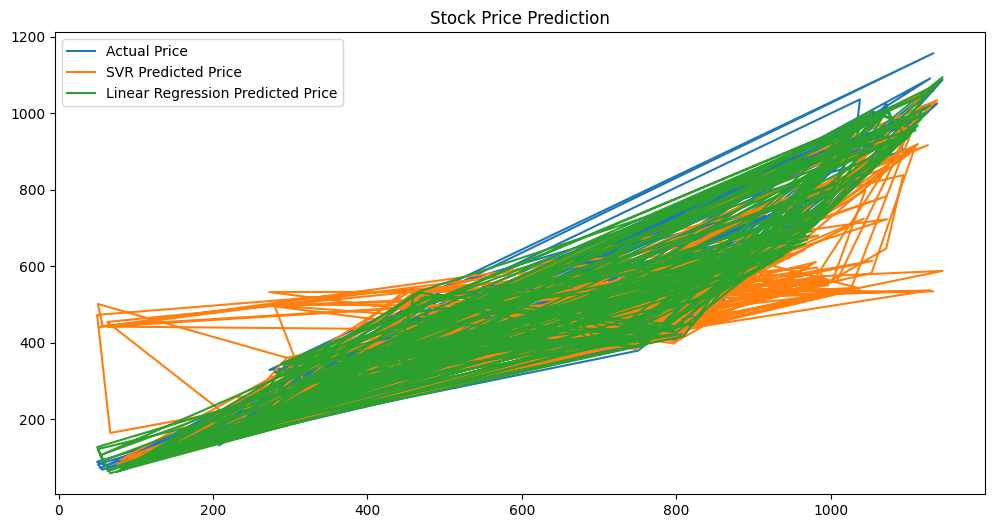

In [10]:
import matplotlib.pyplot as plt

# Plot actual vs predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, svr_predictions, label='SVR Predicted Price')
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predicted Price')
plt.legend()
plt.title('Stock Price Prediction')
plt.show()
